In [2]:
!pip install -q pandas numpy torch torchvision scikit-learn matplotlib seaborn Pillow tqdm

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1. Instalación y configuración


import os
import random
import sys
import numpy as np
import pandas as pd
import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd

# Acceso al dataset
csv_path = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/poi_dataset.csv'
df = pd.read_csv(csv_path)

print(f'Python version: {sys.version}')
print(f'Torch version: {torch.__version__}')
print('GPU available:', torch.cuda.is_available())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Torch version: 2.6.0+cu124
GPU available: True


In [5]:
# 2. Análisis Exploratorio de Datos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
csv_path = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/poi_dataset.csv'
df = pd.read_csv(csv_path)

# Vista general del dataset
display(df.T)
display(df.head())
display(df.info())
display(df.describe(include='all'))

,0,1,2,3,4,5,6,7,8,9,...,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568
id,4b36a3ed-3b28-4bc7-b975-1d48b586db03,e32b3603-a94f-49df-8b31-92445a86377c,0123a69b-13ac-4b65-a5d5-71a95560cff5,390d7d9e-e972-451c-b5e4-f494af15e788,023fc1bf-a1cd-4b9f-af78-48792ab1a294,bcd58127-76bd-44e7-84d8-cc25b46c7962,f45b1b38-36cd-4479-bac1-544ca6b1e685,ca8d89fa-3e9e-4639-ac01-7f83c5d0130e,0089bb20-c132-496c-b215-1986fcfa9d4b,297257de-a00a-4e99-bd21-b3a2c529e916,...,c5c29bd8-c3bc-4405-82ed-7d17d89238ae,4f0f97a5-aa50-4f27-b26c-72909626fb7a,2f3f2208-0682-4ebb-98be-79155ea07783,2d399e39-055a-4469-b2ef-06cfa4345560,6722f309-c1e8-446a-bcec-ff4d8b448923,a1058fc5-8b4e-43db-8758-2a4197eb69ca,77df8476-484e-436e-8977-f957f6b9371a,21c741f5-cbe7-4ae0-a69d-b5c1622056af,4b8b38fa-78b5-4ea8-a676-1de4e2b48caa,d7f45b8d-c311-4309-a85a-d91f1fcd3b2f
name,Galería Fran Reus,Convento de San Plácido,Instituto Geológico y Minero de España,Margarita Gil Roësset,Museo del Traje. Centro de Investigación del P...,Clara Campoamor,Plaza de la Encarnación,Atentado en 1985,Cuesta de los ciegos,Fragmento de la muralla árabe de Madrid,...,Sin datos,Portada,Asilo de nombres usados,"Curiosidades, datos y pormenores de la villa d...",El viaducto,"Plaza de Puerta Cerrada, en Madrid",¡Aquel Madrid!,El viento se acuesta al atardecer,Edificio Metrópolis por Herreros,Monasterio de Moreruela
shortDescription,La Galería Fran Reus es un espacio dedicado a ...,"El Convento de San Plácido en Madrid, fundado ...","El Instituto Geológico y Minero de España, sit...","Margarita Gil Roësset, escultora y poetisa esp...","El Museo del Traje de Madrid, fundado en 2004,...","Clara Campoamor fue una abogada, escritora y p...",Debe su nombre al desaparecido convento de la ...,1985. ETA asesina en Madrid al coronel auditor...,La Cuesta de los Ciegos es una escalera empedr...,Este vestigio de la muralla árabe del siglo IX...,...,"BARAHONA (José Barahona Marco)\nSin datos, ca....","JOSÉ MARÍA PICÓ LÓPEZ\nPortada\nABC, núm. 13.9...",JUAN ESPLANDIÚ PEÑA\nAsilo de nombres usados\n...,"JUAN ESPLANDIÚ PEÑA\nCuriosidades, datos y por...",JOSÉ FRANCISCO AGUIRRE PÉREZ\nEl viaducto\nBla...,"ANTONIO ORBEGOZO\nPlaza de Puerta Cerrada, en ...","JUAN ESPLANDIÚ PEÑA\n¡Aquel Madrid!\nABC, núm....",SERNY (Ricardo Summers e Isern)\nEl viento se ...,HERREROS (Enrique García-Herreros Codesido)\nS...,"Descubre el Monasterio de Moreruela, una joya ..."
categories,"['Escultura', 'Pintura']","['Patrimonio', 'Historia']","['Ciencia', 'Patrimonio']",['Cultura'],"['Patrimonio', 'Cultura']","['Historia', 'Cultura']","['Historia', 'Arquitectura']",['Historia'],"['Arquitectura', 'Historia']","['Arquitectura', 'Patrimonio']",...,['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],['Pintura'],"['Patrimonio', 'Historia', 'Arquitectura']"
tier,1,1,2,1,1,1,2,3,3,2,...,1,1,1,1,1,1,1,1,1,1
locationLon,2.642262,-3.704467,-3.699694,-3.691228,-3.727822,-3.690211,-5.992007,-3.677161,-3.714567,-3.714546,...,-3.688483,-3.703395,-3.690199,-3.704049,-3.715019,-3.707943,-3.68912,-3.712121,-3.695836,-5.7776
locationLat,39.572694,40.423037,40.442045,40.427256,40.439665,40.435082,37.392953,40.4358,40.412984,40.414866,...,40.420718,40.417073,40.409594,40.417024,40.413979,40.413677,40.416555,40.419088,40.418698,41.812321
tags,[],[],[],[],[],[],[],[],[],[],...,"['Constructivismo', 'cartel']","['Nochevieja', 'ABC', 'Periodismo', 'portada']","['César González-Ruano', 'Juan Esplandiú Peña'...",['Puerta del sol'],"['Viaducto', 'Puente']",['Cruz'],"['Puerta', 'Parque del Retiro']","['Estatuas', 'Plaza']","['Alcalá', 'Gran Vía', 'Metrópolis']","['Arquitectura', 'Cisterciense', 'Císter', 'Mo..."
xps,500,500,250,500,500,500,250,100,150,250,...,600,600,600,600,600,600,600,600,600,500
Visits,10009,10010,10015,10011,10020,10019,10013,10019,10007,10018,...,10009,10010,10009,10012,10005,10014,10013,10005,10006,10011


,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
0,4b36a3ed-3b28-4bc7-b975-1d48b586db03,Galería Fran Reus,La Galería Fran Reus es un espacio dedicado a ...,"['Escultura', 'Pintura']",1,2.642262,39.572694,[],500,10009,422,3582,78,data_main/4b36a3ed-3b28-4bc7-b975-1d48b586db03...
1,e32b3603-a94f-49df-8b31-92445a86377c,Convento de San Plácido,"El Convento de San Plácido en Madrid, fundado ...","['Patrimonio', 'Historia']",1,-3.704467,40.423037,[],500,10010,7743,96,2786,data_main/e32b3603-a94f-49df-8b31-92445a86377c...
2,0123a69b-13ac-4b65-a5d5-71a95560cff5,Instituto Geológico y Minero de España,"El Instituto Geológico y Minero de España, sit...","['Ciencia', 'Patrimonio']",2,-3.699694,40.442045,[],250,10015,3154,874,595,data_main/0123a69b-13ac-4b65-a5d5-71a95560cff5...
3,390d7d9e-e972-451c-b5e4-f494af15e788,Margarita Gil Roësset,"Margarita Gil Roësset, escultora y poetisa esp...",['Cultura'],1,-3.691228,40.427256,[],500,10011,8559,79,2358,data_main/390d7d9e-e972-451c-b5e4-f494af15e788...
4,023fc1bf-a1cd-4b9f-af78-48792ab1a294,Museo del Traje. Centro de Investigación del P...,"El Museo del Traje de Madrid, fundado en 2004,...","['Patrimonio', 'Cultura']",1,-3.727822,40.439665,[],500,10020,915,2896,143,data_main/023fc1bf-a1cd-4b9f-af78-48792ab1a294...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


None

,id,name,shortDescription,categories,tier,locationLon,locationLat,tags,xps,Visits,Likes,Dislikes,Bookmarks,main_image_path
count,1569,1569,1569,1569,1569.000000,1569.000000,1569.000000,1569,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569
unique,1492,1458,1491,224,NaN,NaN,NaN,1418,NaN,NaN,NaN,NaN,NaN,1492
top,a0f3f39c-fc87-4031-900d-d4776b1f3491,Ambresbury Banks en el bosque de Epping,"Explora Ambresbury Banks en Epping Forest, un ...","['Patrimonio', 'Historia', 'Arquitectura']",NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,data_main/a0f3f39c-fc87-4031-900d-d4776b1f3491...
freq,7,7,7,100,NaN,NaN,NaN,107,NaN,NaN,NaN,NaN,NaN,7
mean,NaN,NaN,NaN,NaN,1.541109,-1.132337,39.900141,NaN,750.382409,10011.943276,3623.908222,2526.305927,973.261950,NaN
std,NaN,NaN,NaN,NaN,0.637677,22.733401,9.662134,NaN,228.319854,5.456808,4817.879374,2225.543360,1453.333948,NaN
min,NaN,NaN,NaN,NaN,1.000000,-121.951049,-62.940930,NaN,0.000000,10001.000000,100.000000,52.000000,50.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,-3.725292,40.411754,NaN,600.000000,10008.000000,464.000000,937.000000,116.000000,NaN
50%,NaN,NaN,NaN,NaN,1.000000,-3.699140,40.421738,NaN,700.000000,10011.000000,1434.000000,2718.000000,306.000000,NaN
75%,NaN,NaN,NaN,NaN,2.000000,-3.673348,40.472458,NaN,1000.000000,10015.000000,6840.000000,3399.000000,1309.000000,NaN


In [6]:
# 3. Carga del Datset Y limpieza básica

csv_path = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/poi_dataset.csv'
BASE_PATH = '/content/drive/MyDrive/DeepLearning/DeepLearning-main/Proyecto/'
df = pd.read_csv(csv_path)

df['image_path'] = df['main_image_path'].apply(lambda x: os.path.join(BASE_PATH, x) if pd.notnull(x) else None)
df = df[df['image_path'].apply(lambda p: isinstance(p, str) and os.path.exists(p))]
df = df.drop_duplicates(subset=['image_path'], keep='first').reset_index(drop=True)
df = df.drop(columns=['id', 'name', 'shortDescription', 'main_image_path', 'tags'])

print("Shape tras limpieza inicial:", df.shape)

Shape tras limpieza inicial: (1492, 10)


In [7]:
# 4. Limpieza y codificación de categorías

import ast
def parse_categories(val):
    if isinstance(val, list): return val
    if isinstance(val, str):
        try: return ast.literal_eval(val)
        except: return []
    return []

df['categories_clean'] = df['categories'].apply(parse_categories)
df['main_category'] = df['categories_clean'].apply(lambda x: x[0] if isinstance(x, list) and len(x)>0 else 'Unknown')

from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
le_cat = LabelEncoder()
df['categories_enc'] = le_cat.fit_transform(df['main_category'])
mlb = MultiLabelBinarizer()
categories_onehot = mlb.fit_transform(df['categories_clean'])
categories_onehot_df = pd.DataFrame(categories_onehot, columns=[f'cat_{c}' for c in mlb.classes_])
df = pd.concat([df, categories_onehot_df], axis=1)

In [8]:
# 4. Tratamiento de Outliers(IQR)

num_cols = ['tier', 'xps', 'Visits', 'Likes', 'Dislikes', 'Bookmarks', 'locationLon', 'locationLat']
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    before = df.shape[0]
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    print(f"{col}: eliminados {before - df.shape[0]} outliers")

tier: eliminados 7 outliers
xps: eliminados 0 outliers
Visits: eliminados 27 outliers
Likes: eliminados 60 outliers
Dislikes: eliminados 97 outliers
Bookmarks: eliminados 267 outliers
locationLon: eliminados 344 outliers
locationLat: eliminados 84 outliers


In [9]:
# 5. Filtra clases con solo una muestra y split train/test

vc = df['categories_enc'].value_counts()
to_keep = vc[vc > 1].index
df = df[df['categories_enc'].isin(to_keep)].reset_index(drop=True)

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=SEED,
    stratify=df['categories_enc']
)
print("Train shape:", train_df.shape, "Test shape:", test_df.shape)

Train shape: (484, 25) Test shape: (121, 25)


In [10]:
# 6. Reindexado de labels, solo clases presentes en train

from sklearn.preprocessing import LabelEncoder
label_col = 'categories_enc'
le = LabelEncoder()
le.fit(train_df[label_col])  # solo fit con train
train_df[label_col] = le.transform(train_df[label_col])
test_df = test_df[test_df[label_col].isin(le.classes_)]  # elimina clases no presentes en train
test_df[label_col] = le.transform(test_df[label_col])
num_classes = len(le.classes_)

print("Train labels:", sorted(train_df[label_col].unique()))
print("Test labels:", sorted(test_df[label_col].unique()))
print("Num classes:", num_classes)

Train labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]
Test labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
Num classes: 11


In [11]:
# 7. Imputación de nulos

for col in num_cols:
    mean_train = train_df[col].mean()
    train_df[col] = train_df[col].fillna(mean_train)
    test_df[col] = test_df[col].fillna(mean_train)

In [12]:
# 8. Escalado de variables numéricas

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df[num_cols])
train_df[num_cols] = scaler.transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

In [13]:
# 9. Definición de columas de matadatos

metadata_cols = num_cols + [f'cat_{c}' for c in mlb.classes_]

In [14]:
# 10. Dataset de Pytorch (imágenes + metadatos)

from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

class POIDataset(Dataset):
    def __init__(self, df, metadata_cols, label_col, transform=None):
        self.df = df.reset_index(drop=True)
        self.metadata_cols = metadata_cols
        self.label_col = label_col
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image = Image.open(row['image_path']).convert('RGB')
        if self.transform:
            image = self.transform(image)
        meta = row[self.metadata_cols].values.astype(np.float32)
        label = row[self.label_col]
        return image, torch.tensor(meta), torch.tensor(label, dtype=torch.long)

In [15]:
# 11. Transformaciones de imágenes

from torchvision import transforms

IMG_SIZE = 224
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

In [16]:
# 12. Preparar Dataset y Dataloader

label_col = 'categories_enc'  # O la columna objetivo
train_dataset = POIDataset(train_df, metadata_cols, label_col, transform=train_transform)
test_dataset  = POIDataset(test_df, metadata_cols, label_col, transform=test_transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Ejemplo: Inspección de batch
images, metas, labels = next(iter(train_loader))
print("Shape imágenes:", images.shape)
print("Shape metadatos:", metas.shape)
print("Shape labels:", labels.shape)

Shape imágenes: torch.Size([32, 3, 224, 224])
Shape metadatos: torch.Size([32, 20])
Shape labels: torch.Size([32])


In [17]:
# 13. Definición del modelo híbrido(imágen + metadatos)

import torch.nn as nn
from torchvision.models import resnet18, ResNet18_Weights

class HybridPOIModel(nn.Module):
    def __init__(self, meta_input_dim, num_classes):
        super().__init__()
        self.cnn = resnet18(weights=ResNet18_Weights.DEFAULT)
        self.cnn.fc = nn.Identity()
        self.meta_net = nn.Sequential(
            nn.Linear(meta_input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
        )
        self.classifier = nn.Sequential(
    nn.Linear(512 + 32, 128),
    nn.ReLU(),
    nn.Dropout(0.5),   # Subido de 0.3 a 0.5
    nn.Linear(128, num_classes)
        )

    def forward(self, image, meta):
        x_img = self.cnn(image)
        x_meta = self.meta_net(meta)
        x = torch.cat([x_img, x_meta], dim=1)
        logits = self.classifier(x)
        return logits

In [18]:
# 14. Bucle de entrenamiento y evaluación

from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, metas, labels in tqdm(dataloader):
        images, metas, labels = images.to(device), metas.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images, metas)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0
    with torch.no_grad():
        for images, metas, labels in tqdm(dataloader):
            images, metas, labels = images.to(device), metas.to(device), labels.to(device)
            outputs = model(images, metas)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    avg_loss = running_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [19]:
# 15. Entrenamiento del modelo híbrido

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = HybridPOIModel(meta_input_dim=len(metadata_cols), num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

n_epochs = 10
for epoch in range(n_epochs):
    print(f"Epoch {epoch+1}/{n_epochs}")
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = evaluate(model, test_loader, criterion, device)
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"  Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 179MB/s]


Epoch 1/10


100%|██████████| 4/4 [00:22<00:00,  5.60s/it]


  Train Loss: 2.2480 | Train Acc: 0.1983
  Val   Loss: 2.0778 | Val   Acc: 0.2975
Epoch 2/10


100%|██████████| 4/4 [00:00<00:00,  5.98it/s]


  Train Loss: 1.8390 | Train Acc: 0.3595
  Val   Loss: 1.8701 | Val   Acc: 0.2810
Epoch 3/10


100%|██████████| 4/4 [00:01<00:00,  3.83it/s]


  Train Loss: 1.7289 | Train Acc: 0.3884
  Val   Loss: 1.7749 | Val   Acc: 0.2975
Epoch 4/10


100%|██████████| 4/4 [00:00<00:00,  6.12it/s]


  Train Loss: 1.6288 | Train Acc: 0.4008
  Val   Loss: 1.7584 | Val   Acc: 0.3058
Epoch 5/10


100%|██████████| 4/4 [00:00<00:00,  5.81it/s]


  Train Loss: 1.5047 | Train Acc: 0.4649
  Val   Loss: 1.7485 | Val   Acc: 0.2810
Epoch 6/10


100%|██████████| 4/4 [00:00<00:00,  6.08it/s]


  Train Loss: 1.4075 | Train Acc: 0.4979
  Val   Loss: 1.7806 | Val   Acc: 0.3058
Epoch 7/10


100%|██████████| 4/4 [00:00<00:00,  6.01it/s]


  Train Loss: 1.3490 | Train Acc: 0.5103
  Val   Loss: 1.8080 | Val   Acc: 0.2893
Epoch 8/10


100%|██████████| 4/4 [00:01<00:00,  3.86it/s]


  Train Loss: 1.2230 | Train Acc: 0.5579
  Val   Loss: 1.8225 | Val   Acc: 0.2727
Epoch 9/10


100%|██████████| 4/4 [00:00<00:00,  6.33it/s]


  Train Loss: 1.1097 | Train Acc: 0.6178
  Val   Loss: 1.8597 | Val   Acc: 0.2975
Epoch 10/10


100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

  Train Loss: 0.9778 | Train Acc: 0.6983
  Val   Loss: 1.8369 | Val   Acc: 0.3058


1. Evolución del entrenamiento:

    -Train Loss: Disminuye constantemente, de 2.25 en la época 1 a 0.98 en la época 10.

    -Train Acc: Sube de 0.20 (~20%) a 0.70 (70%). El modelo aprende sobre el conjunto de entrenamiento.

    -Val Loss: Empieza en 2.08 y baja ligeramente a 1.83, pero se estabiliza a partir de la época 4-5.

    -Val Acc: Se mueve entre 27% y 31% y NO mejora claramente con las épocas.

2. Diagnóstico del comportamiento:
A. Aprendizaje insuficiente / Capacidad limitada

    -El modelo aprende en entrenamiento pero NO generaliza en validación.

    -La precisión en validación se estanca y apenas varía entre épocas.

    -El gap (diferencia) entre entrenamiento (70%) y validación (30%) crece con las épocas.

B. Potencial Overfitting

    -El modelo cada vez es mejor en los datos vistos (entrenamiento) pero no en los no vistos (validación).

    -La val_loss se mantiene alta o incluso sube, mientras la train_loss baja rápido.

    -Conclusión: Sí, hay overfitting.

In [24]:
# Predicciones del test

import numpy as np
import torch

model.eval()  # Ponemos el modelo en modo evaluación
all_preds = []
all_labels = []

with torch.no_grad():
    for images, metadata, labels in test_loader:
        images = images.to(device)
        metadata = metadata.to(device)
        outputs = model(images, metadata)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

y_pred = np.array(all_preds)
y_true = np.array(all_labels)

Evaluación en conjunto de test
              precision    recall  f1-score   support

           0     0.2000    0.0667    0.1000        15
           1     0.0000    0.0000    0.0000         2
           2     0.0000    0.0000    0.0000         1
           3     0.3256    0.3889    0.3544        36
           4     0.5000    0.2308    0.3158        13
           5     0.0000    0.0000    0.0000         1
           6     0.0000    0.0000    0.0000        18
           7     0.0000    0.0000    0.0000         1
           8     0.3276    0.5938    0.4222        32
           9     0.0000    0.0000    0.0000         2

    accuracy                         0.3058       121
   macro avg     0.1353    0.1280    0.1192       121
weighted avg     0.2620    0.3058    0.2634       121



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


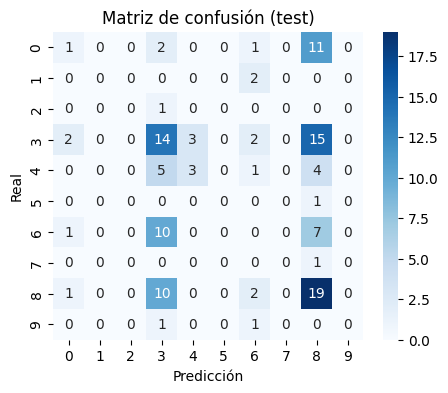

In [25]:
# Evaluación en conjunto de test

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Evaluación en conjunto de test")
print("="*30)
print(classification_report(y_true, y_pred, digits=4))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión (test)')
plt.show()

INTERPRETACIÓN DE LOS RESULTADOS


1. Precisión general (accuracy):

    -Accuracy: 0.3058 (≈ 30,6%).
    -El modelo acierta el 30% de los casos, que es un valor bajo para la mayoría de tareas de clasificación. Indica -dificultades para distinguir correctamente las clases, especialmente si hay 10 clases y algunas están desbalanceadas.

2. Análisis por clase

    -Varias clases (1, 2, 5, 6, 7, 9) tienen precisión, recall y F1 = 0:
    -Esto significa que el modelo no ha predicho ninguna vez esas clases o no ha acertado ninguna.
    -Es común si hay muy pocos ejemplos de esas clases o si el modelo no las distingue.

    -Mejores resultados para las clases 3, 4 y 8, aunque aún lejos de valores ideales:

        Clase 3: F1 = 0.35, recall = 0.39

        Clase 8: F1 = 0.42, recall = 0.59 (la mejor)

        Clase 4: F1 = 0.32

3. Métricas medias

    -Macro avg (media por clase): F1 = 0.12

    -Weighted avg (media ponderada): F1 = 0.26

Estos valores reflejan que el modelo solo es útil en algunas clases y falla mucho en otras.


4.   El modelo no logra distinguir bien varias categorías de engagement o POIs.

5.   Puede estar afectado por:

        -Pocas muestras por clase

        -Modelo poco complejo o con poca capacidad

        -Features (imágenes y metadatos) poco informativos

        -Entrenamiento insuficiente o hiperparámetros no óptimos